<a href="https://colab.research.google.com/github/springboardmentor1234x-stack/CreditPath-AI/blob/Pratichee-Acharya/Credit_Path_AI_(complete).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Anonymize_Loan_Default_data.csv", encoding = "latin1")

In [ ]:
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (38480, 37)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              38480 non-null  int64  
 1   id                      38480 non-null  int64  
 2   member_id               38480 non-null  int64  
 3   loan_amnt               38479 non-null  float64
 4   funded_amnt             38479 non-null  float64
 5   funded_amnt_inv         38479 non-null  float64
 6   term                    38480 non-null  object 
 7   int_rate                38480 non-null  float64
 8   installment             38479 non-null  float64
 9   emp_length              37487 non-null  object 
 10  home_ownership          38480 non-null  object 
 11  annual_inc              38478 non-null  float64
 12  verification_status     38480 non-null  object 
 13  issue_d                 38480 non-null  object 
 14  loan_status             38480 non-null

In [ ]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
count,38480.000000,3.848000e+04,3.848000e+04,38479.000000,38479.000000,38479.000000,38480.00000,38479.000000,3.847800e+04,38480.000000,...,38479.000000,38479.000000,3.847600e+04,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38480.000000
mean,19240.500000,6.649979e+05,8.261899e+05,11094.727644,10831.856337,10150.141518,12.16430,323.163255,6.899531e+04,13.378119,...,9.342966,0.057902,1.428987e+04,22.108501,11980.696892,11274.519569,9646.412705,2232.768235,2614.441757,0.151481
std,11108.363516,2.192322e+05,2.793531e+05,7405.416042,7146.853682,7128.026828,3.73744,209.089097,6.447639e+04,6.744356,...,4.498075,0.245707,2.194138e+04,11.588602,9006.505205,8946.229941,7051.828302,2570.177312,4391.969583,0.358522
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9620.750000,4.983645e+05,6.384620e+05,5200.000000,5100.000000,4950.000000,9.62000,165.740000,4.000000e+04,8.200000,...,6.000000,0.000000,3.639750e+03,13.000000,5463.099238,4811.735000,4400.000000,657.700000,212.010000,0.000000
50%,19240.500000,6.443195e+05,8.242545e+05,9750.000000,9600.000000,8495.792749,11.99000,277.980000,5.865000e+04,13.485000,...,9.000000,0.000000,8.839500e+03,20.000000,9673.221341,8953.240000,8000.000000,1335.090000,526.000000,0.000000
75%,28860.250000,8.265608e+05,1.034706e+06,15000.000000,15000.000000,14000.000000,14.72000,429.350000,8.200000e+04,18.690000,...,12.000000,0.000000,1.726550e+04,29.000000,16402.394995,15486.925000,13315.100000,2795.020000,3169.815000,0.000000
max,38480.000000,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,100.99000,1305.190000,6.000000e+06,100.000000,...,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000,1.000000


In [ ]:
print(df.isnull())

       Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           False  False      False      False        False            False   
1           False  False      False      False        False            False   
2           False  False      False      False        False            False   
3           False  False      False      False        False            False   
4           False  False      False      False        False            False   
...           ...    ...        ...        ...          ...              ...   
38475       False  False      False      False        False            False   
38476       False  False      False      False        False            False   
38477       False  False      False      False        False            False   
38478       False  False      False      False        False            False   
38479       False  False      False      False        False            False   

        term  int_rate  installment  em

In [ ]:
print("Missing values per column b4:\n", df.isnull().sum())
threshold = 0.4 * len(df)   # 40% of total rows
df = df.dropna(thresh=threshold, axis=1)
print("\nMissing values per column after:\n", df.isnull().sum())

Missing values per column b4:
 Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
term                          0
int_rate                      0
installment                   1
emp_length                  993
home_ownership                0
annual_inc                    2
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   1
earliest_cr_line              0
inq_last_6mths                1
mths_since_last_delinq    24363
open_acc                      1
pub_rec                       1
revol_bal                     4
revol_util                   59
total_acc                     1
total_pymnt                   1
total_pymnt_inv               1
total_rec

In [ ]:
print(df['annual_inc'].value_counts())
print(df['annual_inc'].value_counts(normalize=True))

annual_inc
60000.00    1440
50000.00    1018
40000.00     857
45000.00     830
30000.00     810
            ... 
31323.00       1
47839.92       1
90750.00       1
35292.00       1
13296.00       1
Name: count, Length: 5191, dtype: int64
annual_inc
60000.00    0.037424
50000.00    0.026457
40000.00    0.022272
45000.00    0.021571
30000.00    0.021051
              ...   
31323.00    0.000026
47839.92    0.000026
90750.00    0.000026
35292.00    0.000026
13296.00    0.000026
Name: proportion, Length: 5191, dtype: float64


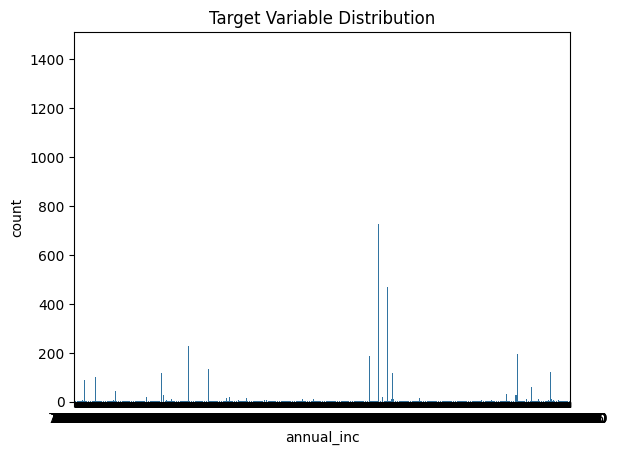

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="annual_inc", data=df)
plt.title("Target Variable Distribution")
plt.show()

/tmp/ipython-input-1395395382.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="repay_fail", data=df, palette="Set2")


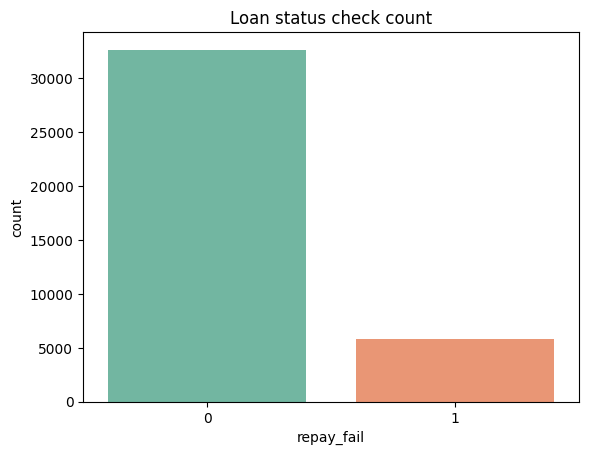

In [ ]:
sns.countplot(x="repay_fail", data=df, palette="Set2")
plt.title("Loan status check count")
plt.show()

In [ ]:
feature = "loan_amnt"
target = "repay_fail"

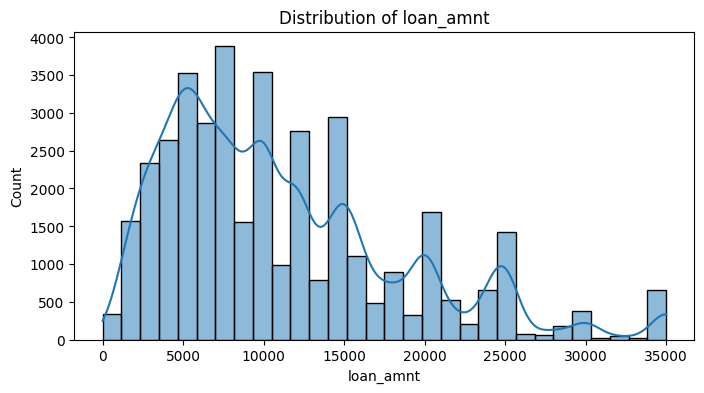

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f"Distribution of {feature}")
plt.show()

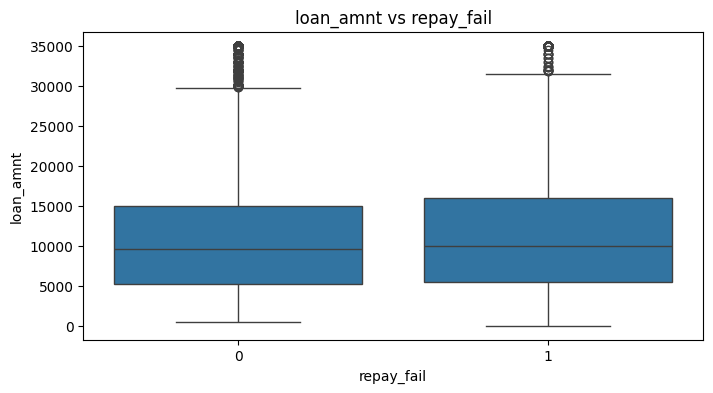

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=target, y=feature, data=df)
plt.title(f"{feature} vs {target}")
plt.show()

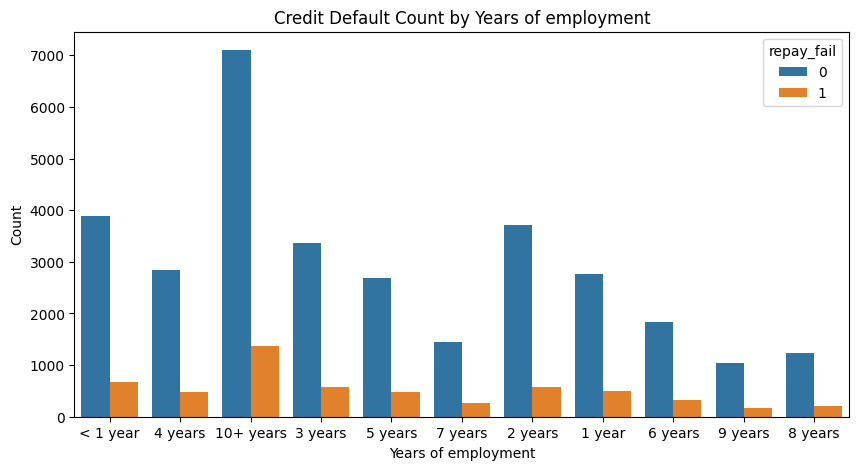

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='emp_length', hue='repay_fail', data=df)
plt.title('Credit Default Count by Years of employment')
plt.xlabel('Years of employment')
plt.ylabel('Count')
plt.show()

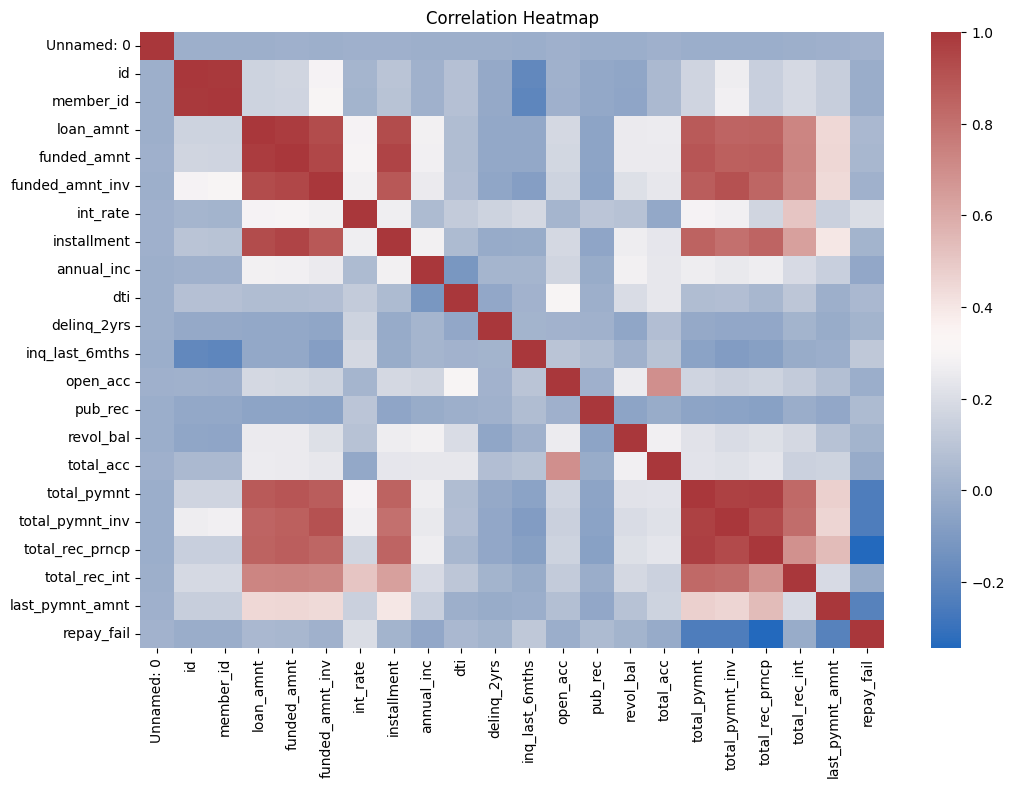

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='vlag')
plt.title('Correlation Heatmap')
plt.show()

ASSIGNMENT
---
5 Key Insights about my data that I got after performing EDA are:

1. Interest rate is positively correlated to replayment failure(default): meaning people having higher loan interest rate tends to default more.
2. Last payment amount is negatively correlated to replayment failure: meaning if last payment is high less likely to default.
3. Annual Income is negatively correlated: Higher income borrower less chances of default.
4. Higher DTI more default.
5. Recent Credit Inquiries more default.


---


Additionally, from the Loan status bar graph shows that this dataset is highly biased towards not-default data.

And from the box plot we see that there are some outliers in the data.

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,1
funded_amnt,1
funded_amnt_inv,1
term,0
int_rate,0
installment,1
emp_length,993


In [ ]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mode()[0])

In [ ]:
df['revol_bal'] = df['revol_bal'].fillna(df['revol_bal'].median())

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_features=['loan_amnt','annual_inc','dti','revol_bal']
scaler=StandardScaler()
df[numerical_features]=scaler.fit_transform(df[numerical_features])
print(df.head())

   Unnamed: 0      id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           2       2          2  -1.498210          0.0              0.0   
1           3  545583     703644  -1.160615       2500.0           2500.0   
2           4  532101     687836  -0.823020       5000.0           5000.0   
3           5  877788    1092507  -0.552944       7000.0           7000.0   
4           6  875406    1089981  -1.228134       2000.0           2000.0   

        term  int_rate  installment emp_length  ... revol_util  total_acc  \
0  36 months      0.00         0.00   < 1 year  ...    0.00%        1.0   
1  36 months     13.98        85.42    4 years  ...     21.30%       10.0   
2  36 months     15.95       175.67    4 years  ...     99.90%       15.0   
3  36 months      9.91       225.58  10+ years  ...     47.20%       20.0   
4  36 months      5.42        60.32  10+ years  ...         0%       15.0   

   total_pymnt total_pymnt_inv total_rec_prncp total_rec_int last_pymnt_d 

In [ ]:
df=pd.get_dummies(df, drop_first=True)
print(df.head())

   Unnamed: 0      id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           2       2          2  -1.498210          0.0              0.0   
1           3  545583     703644  -1.160615       2500.0           2500.0   
2           4  532101     687836  -0.823020       5000.0           5000.0   
3           5  877788    1092507  -0.552944       7000.0           7000.0   
4           6  875406    1089981  -1.228134       2000.0           2000.0   

   int_rate  installment  annual_inc       dti  ...  \
0      0.00         0.00   -1.070100 -1.983628  ...   
1     13.98        85.42   -0.759843  0.961095  ...   
2     15.95       175.67   -0.155025  0.918095  ...   
3      9.91       225.58   -0.235738 -0.382268  ...   
4      5.42        60.32   -0.604808 -1.449841  ...   

   last_credit_pull_d_Oct-15  last_credit_pull_d_Sep-07  \
0                      False                      False   
1                      False                      False   
2                      False 

In [ ]:
df = df.fillna(df.median(numeric_only=True))
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
X = df.drop('repay_fail', axis=1)
y = df['repay_fail']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model=LogisticRegression()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("ROC-AUC:\n",roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report (y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC:
 0.9797129315636061
Confusion Matrix:
 [[9784   11]
 [  69 1680]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      9795
           1       0.99      0.96      0.98      1749

    accuracy                           0.99     11544
   macro avg       0.99      0.98      0.99     11544
weighted avg       0.99      0.99      0.99     11544



In [ ]:
from sklearn.model_selection import train_test_split
target = 'repay_fail'
X = df.drop(target, axis=1)
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)

# LightGBM
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:20:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 4080, number of negative: 22856
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7789
[LightGBM] [Info] Number of data points in the train set: 26936, number of used features: 1821
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151470 -> initscore=-1.723117
[LightGBM] [Info] Start training from score -1.723117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [40]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
# Evaluate all models
models = {'Logistic Regression': lr, 'XGBoost': xgb, 'LightGBM': lgb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    cm = confusion_matrix(y_test, y_pred)
    print(f'\n{"-"*50}')
    print(f'{name}')
    print(f'{"-"*50}')
    print(f'AUC-ROC: {auc:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Classification Report:')
    print(classification_report(y_test, y_pred))


--------------------------------------------------
Logistic Regression
--------------------------------------------------
AUC-ROC: 0.9964
Confusion Matrix:
[[9787    8]
 [  44 1705]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9795
           1       1.00      0.97      0.98      1749

    accuracy                           1.00     11544
   macro avg       1.00      0.99      0.99     11544
weighted avg       1.00      1.00      1.00     11544


--------------------------------------------------
XGBoost
--------------------------------------------------
AUC-ROC: 1.0000
Confusion Matrix:
[[9795    0]
 [   3 1746]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9795
           1       1.00      1.00      1.00      1749

    accuracy                           1.00     11544
   macro avg       1.00      1.00      1.00     11544

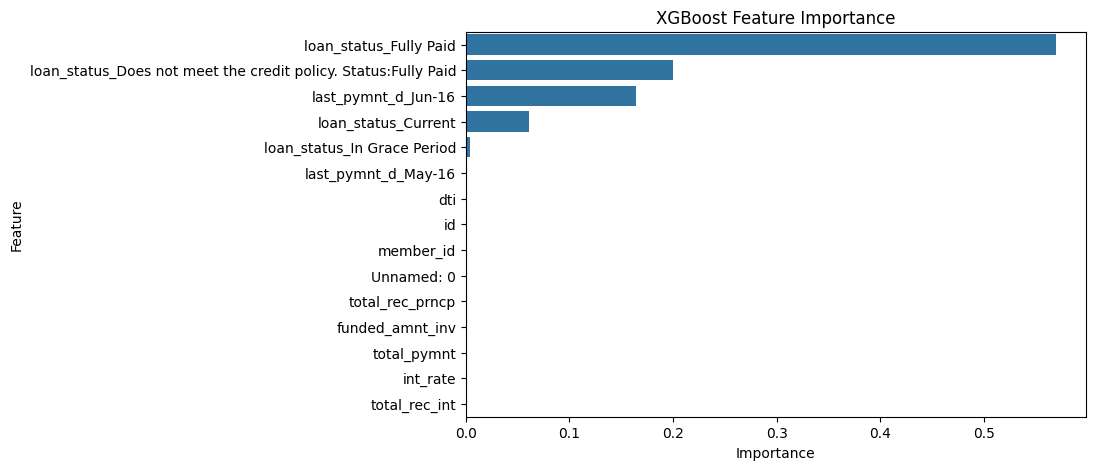

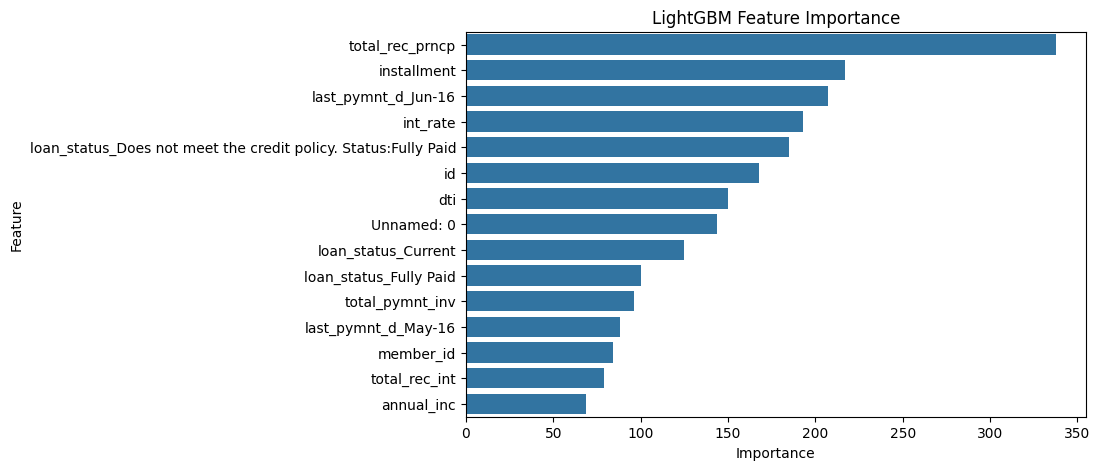

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_importance(model, model_name):
    importance = model.feature_importances_
    features = X.columns
    imp_df = pd.DataFrame({'Feature': features, 'Importance': importance})
    imp_df = imp_df.sort_values(by='Importance', ascending=False).head(15)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=imp_df)
    plt.title(f'{model_name} Feature Importance')
    plt.show()

plot_importance(xgb, "XGBoost")
plot_importance(lgb, "LightGBM")

In [42]:
y_pred_proba = lgb.predict_proba(X_test)[:, 1]

In [43]:
borrower_ids = df.loc[X_test.index, 'id'] if 'id' in df.columns else X_test.index

results = pd.DataFrame({
    'borrower_id': borrower_ids,
    'predicted_default_risk': y_pred_proba,
    'actual_default': y_test.values
})

In [44]:
results = results.sort_values(by='predicted_default_risk', ascending=False)
results.head(10)

,borrower_id,predicted_default_risk,actual_default
37687,788425,0.999968,1
2839,825164,0.999967,1
10387,490252,0.999967,1
25045,705954,0.999967,1
23292,1035487,0.999967,1
30017,349233,0.999967,1
6899,602193,0.999967,1
26167,645050,0.999967,1
22219,1034865,0.999967,1
5435,489032,0.999967,1


In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [47]:
xgb_param_grid = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [48]:
lgb_param_grid = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 0.5, 1]
}

In [49]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [50]:
lgb_model = LGBMClassifier(random_state=42)

lgb_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

lgb_search.fit(X_train, y_train)
print("Best LightGBM Parameters:", lgb_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 4080, number of negative: 22856
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7789
[LightGBM] [Info] Number of data points in the train set: 26936, number of used features: 1821
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151470 -> initscore=-1.723117
[LightGBM] [Info] Start training from score -1.723117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [51]:
best_xgb = xgb_search.best_estimator_
best_lgb = lgb_search.best_estimator_

best_xgb.fit(X_train, y_train)
best_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4080, number of negative: 22856
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7789
[LightGBM] [Info] Number of data points in the train set: 26936, number of used features: 1821
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151470 -> initscore=-1.723117
[LightGBM] [Info] Start training from score -1.723117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier(learning_rate=0.01, max_depth=7, n_estimators=600,
               random_state=42, reg_lambda=0)

In [52]:
# Predictions
y_pred_xgb = best_xgb.predict(X_test)
y_pred_lgb = best_lgb.predict(X_test)

# Probabilities for AUC
y_prob_xgb = best_xgb.predict_proba(X_test)[:,1]
y_prob_lgb = best_lgb.predict_proba(X_test)[:,1]

# Evaluation
print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))
print("LightGBM AUC:", roc_auc_score(y_test, y_prob_lgb))

print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))

XGBoost AUC: 1.0
LightGBM AUC: 0.9999995913948933

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9795
           1       1.00      1.00      1.00      1749

    accuracy                           1.00     11544
   macro avg       1.00      1.00      1.00     11544
weighted avg       1.00      1.00      1.00     11544


LightGBM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9795
           1       1.00      1.00      1.00      1749

    accuracy                           1.00     11544
   macro avg       1.00      1.00      1.00     11544
weighted avg       1.00      1.00      1.00     11544

